# Adult (Classification)
## Data Cleaning, Exploration and Wrangling

### Source
- http://archive.ics.uci.edu/ml/datasets/Abalone

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")
%matplotlib inline

from eda import plot_corr_mat, evaluate_regression, plot_regression

In [2]:
df_tr = pd.read_csv('lake/adult/adult_train.csv')
df_te = pd.read_csv('lake/adult/adult_test.csv')
print(df_tr.shape)
print(df_te.shape)

(32561, 15)
(16281, 15)


In [3]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  >50K<=50K       32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Merge Datasets

In [4]:
df_tr['for_training'] = True
df_te['for_training'] = False
df = pd.concat([df_tr, df_te], axis=0).reindex()
df.shape

(48842, 16)

In [5]:
print(df.columns)
df.head()

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       '>50K<=50K', 'for_training'],
      dtype='object')


age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country >50K<=50K  \
0          2174             0              40   United-States     <=50K   
1             0             0              13   United-States     <=50K   
2             0             0              40   United-States     <=50K   
3             0             0              40   United-States     <=50K   
4             0             0              40            Cuba     <=50K   

   for_training  
0          True  
1          True  
2          True  
3          True  
4          True

### Types of Features 

In [6]:
# Numerical
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain',
            'capital_loss', 'hours_per_week']
df[num_cols].describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [7]:
# Categorical
categorical_cols = [col for col in df.columns if col not in num_cols]
print(categorical_cols)
df[categorical_cols].describe()

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', '>50K<=50K', 'for_training']


workclass education       marital_status       occupation relationship  \
count      48842     48842                48842            48842        48842   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       33906     15784                22379             6172        19716   

          race    sex  native_country >50K<=50K for_training  
count    48842  48842           48842     48842        48842  
unique       5      2              42         4            2  
top      White   Male   United-States     <=50K         True  
freq     41762  32650           43832     24720        32561

In [8]:
print("{} Variables are numerical and {} are categorical".format(len(num_cols), len(categorical_cols)))

6 Variables are numerical and 10 are categorical



### Specific Transformations

In [19]:
# Remove extra space at the first character
string_columns = df.loc[:, df.dtypes == np.object].copy() # Select all text columns
# Strip all values
df.loc[:, df.dtypes == np.object] = string_columns.applymap(lambda text: text.strip())

In [21]:
df['>50K<=50K'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: >50K<=50K, dtype: int64

In [25]:
df['>50K<=50K'] = df['>50K<=50K'].replace({'>50K.': '>50K', '<=50K.': '<=50K'})

<AxesSubplot:>

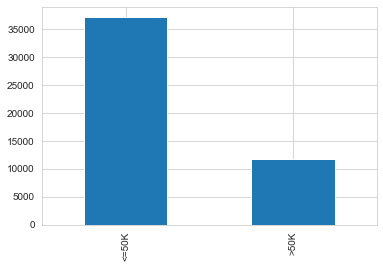

In [26]:
df['>50K<=50K'].value_counts().plot.bar()

### Missing Values

In [33]:
# Workclass has '?' as symbol
# Occupation has '?' as symbol
# Capital Gain has mainly zeroes.

df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
>50K<=50K         0
for_training      0
dtype: int64

TODO: Re-evaluate this analysis.

### Duplicated Values

In [31]:
dups = df[df.duplicated(keep=False)].sort_values('age')
print(dups.shape)
dups.head(6)

(57, 16)


age      workclass  fnlwgt      education  education_num  \
15960   18   Self-emp-inc  378036           12th              8   
3900    18   Self-emp-inc  378036           12th              8   
18698   19        Private   97261        HS-grad              9   
21490   19        Private  146679   Some-college             10   
17673   19        Private   97261        HS-grad              9   
31993   19        Private  251579   Some-college             10   

       marital_status        occupation    relationship    race    sex  \
15960   Never-married   Farming-fishing       Own-child   White   Male   
3900    Never-married   Farming-fishing       Own-child   White   Male   
18698   Never-married   Farming-fishing   Not-in-family   White   Male   
21490   Never-married   Exec-managerial       Own-child   Black   Male   
17673   Never-married   Farming-fishing   Not-in-family   White   Male   
31993   Never-married     Other-service       Own-child   White   Male   

       capital_gain  capital_loss  hours_per_week  native_country >50K<=50K  \
15960             0             0              10   United-States    <=50K.   
3900              0             0              10   United-States    <=50K.   
18698             0             0              40   United-States     <=50K   
21490             0             0              30   United-States     <=50K   
17673             0             0              40   United-States     <=50K   
31993             0             0              14   United-States     <=50K   

       for_training  
15960         False  
3900          False  
18698          True  
21490          True  
17673          True  
31993          True

### Feature Exploration

In [32]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]


### Correlation Analysis

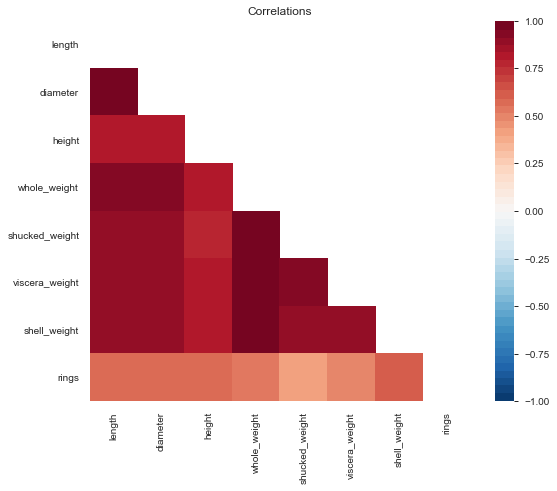

In [13]:
plot_corr_mat(df)

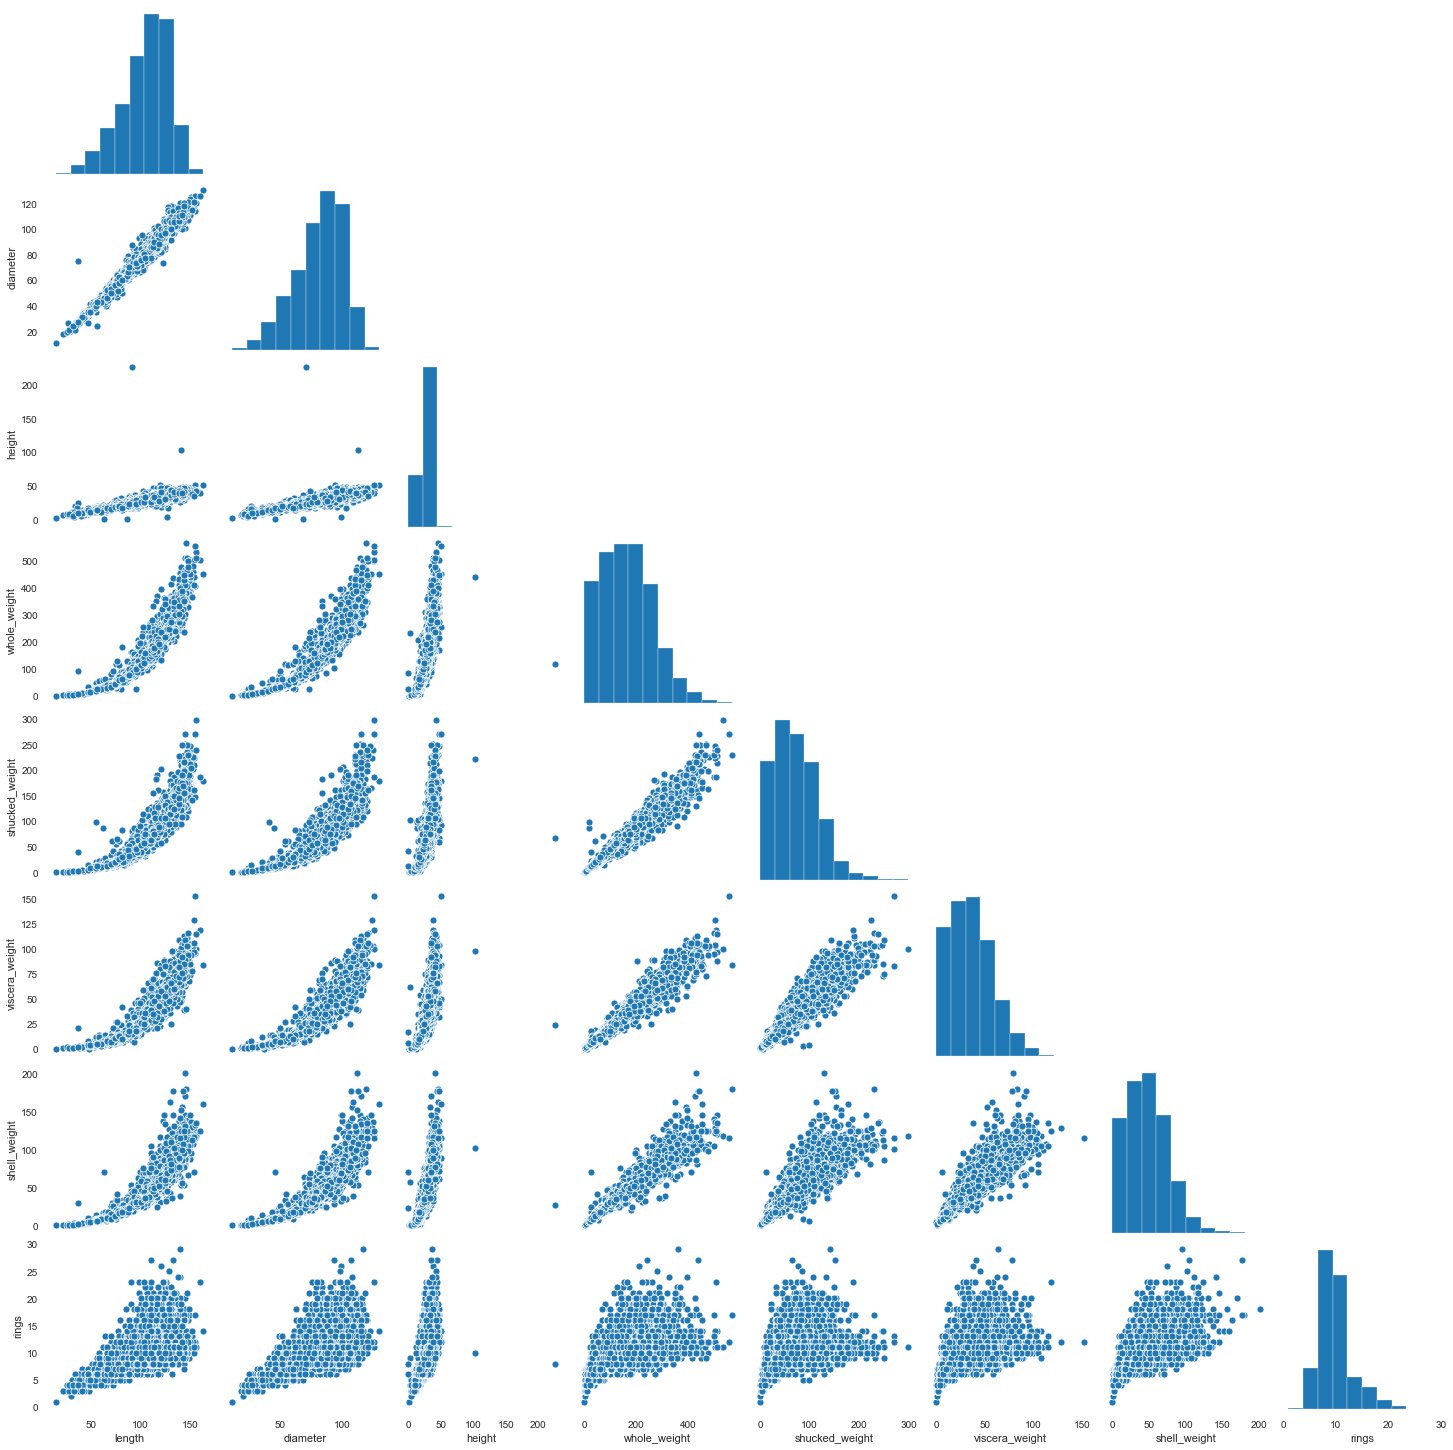

In [14]:
sns.pairplot(df, corner=True);

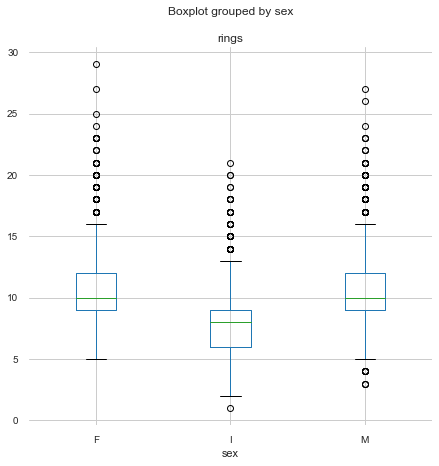

In [15]:
df.boxplot(column='rings', by='sex', figsize=(7,7));

For Male and Female:
- 50% of each have between 9 and 12 rings with a median of 10.
- 16 rings and above are considered outliers by the Inter-quartile range.

For Infant
- 50% of Infant abalones range between 6 and 9 rings with a median of 8.
- 14 rings and abote are considered outliers by IQR 

## Building Models

In [16]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.options.display.float_format = "{:,.6f}".format

In [17]:
features = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
            'viscera_weight', 'shell_weight']
X = df[features]
y = df.rings
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)
print(X_train.shape, X_test.shape)
print(y_test.shape, y_test.shape)

(3132, 7) (1045, 7)
(1045,) (1045,)


In [18]:
# Raw Features
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
pd.DataFrame({'Actuals': y_test, 'Predictions': y_pred})

Actuals  Predictions
3546        7     8.303072
2426       14    12.399071
413        12    10.381279
1625       10     9.051748
173         8     9.379217
...       ...          ...
345        13     9.505625
85         12    17.378525
482        15    10.005368
1427       14    11.312579
2817        7     6.038314

[1045 rows x 2 columns]

In [19]:
linreg.coef_

array([-0.01856202,  0.06672922,  0.14068151,  0.04739487, -0.10143262,
       -0.0574532 ,  0.03313223])

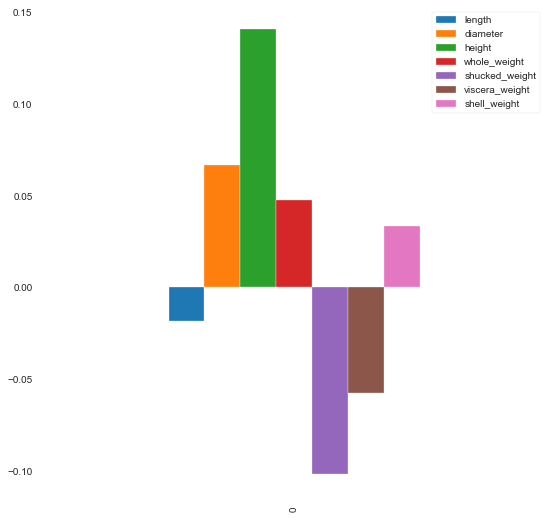

In [20]:
def coeficient_importance(linear_model, columns, excluded_cols=[]):
    coeficients = pd.DataFrame([linear_model.coef_], columns=columns)
    all_other_columns = [col for col in columns if col not in excluded_cols]
    fig, ax = plt.subplots(figsize=(9,9))
    coeficients[all_other_columns].plot.bar(ax=ax)
    
coeficient_importance(linreg, features)

(MAE) Mean absolute error: 1.60
(MSE) Mean squared error: 5.41
(R2) Coefficient of determination: 0.43


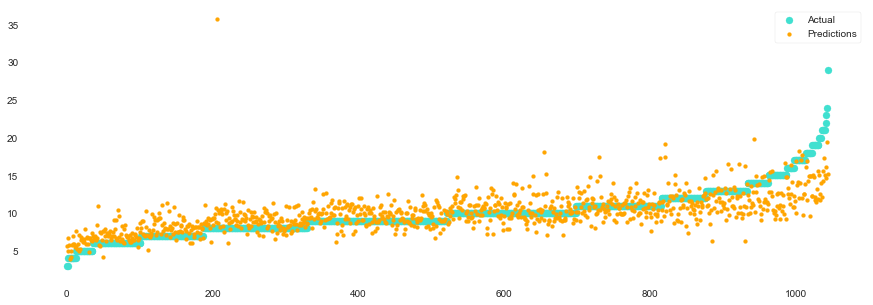

In [21]:
evaluate_regression(y_test, y_pred)
plot_regression(y_test, y_pred)

In [22]:
# SVR
from sklearn.preprocessing import StandardScaler
xscaler = StandardScaler(); x_test_scaler = StandardScaler()
yscaler = StandardScaler(); y_test_scaler = StandardScaler()
X_train_sc = xscaler.fit_transform(X_train)
y_train_sc = yscaler.fit_transform(y_train.values.reshape(-1,1))
X_test_sc = x_test_scaler.fit_transform(X_test)
y_test_sc = y_test_scaler.fit_transform(y_test.values.reshape(-1,1))

In [23]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train_sc, y_train_sc.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
y_pred_sc = svr.predict(X_test_sc)
y_pred = y_test_scaler.inverse_transform(y_pred_sc)
pd.DataFrame({'Actuals': y_test, 'Predictions': y_pred})

Actuals  Predictions
3546        7     7.694529
2426       14    12.483340
413        12    10.344195
1625       10     8.463216
173         8    10.181977
...       ...          ...
345        13    10.123948
85         12    18.478312
482        15     9.376100
1427       14    11.303352
2817        7     5.953234

[1045 rows x 2 columns]

(MAE) Mean absolute error: 1.45
(MSE) Mean squared error: 4.49
(R2) Coefficient of determination: 0.53


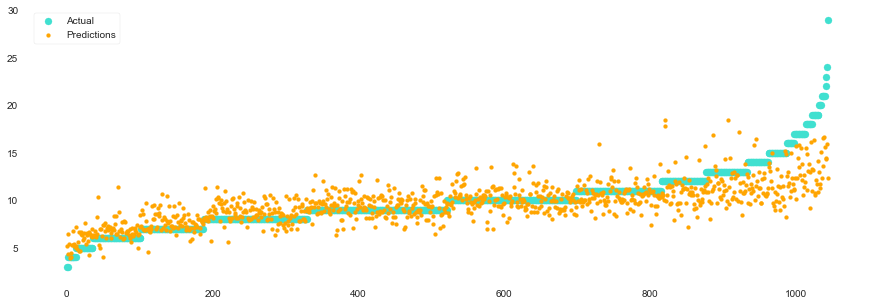

In [27]:
evaluate_regression(y_test, y_pred)
plot_regression(y_test, y_pred)